
# Data Science on <br/> Software Data
<b>Markus Harrer</b>, Software Development Analyst
  
`@feststelltaste`


<small>Java Forum Stuttgart 2019, 04.07.2019</small>

<img src="../resources/innoq_logo.jpg" width=20% height="20%" align="right"/>

## Data Science

### Was ist Data Science?

"**Statistik** auf nem <b><span class="green">Mac</span></b>."
<br/>
<br/>
<div align="right"><small>Nach https://twitter.com/cdixon/status/428914681911070720</small></div>

### Meine Definition

#### Was bedeutet "**data**"?
"Without **data** you‘re just another person with an opinion."
<br/>
<div align="right"><small>W. Edwards Deming</small></div>

<b>=> Belastbare Erkenntnisse mittels <span class="green">Fakten</span> liefern</b>

#### Was bedeutet "**science**"?
  
  
"The aim of **science** is to seek the simplest explanations of complex facts."
<br/>
<div align="right"><small>Albert Einstein</small></div>

<b>=> Neue Erkenntnisse <span class="green">verständlich</span> herausarbeiten</b>

### Vorgehen
<small>Nach Roger Pengs "Stages of Data Analysis"</small><br/>
I. Fragestellung  
II. Datenbeschaffung  
III. Modellierung  
IV. Interpretation  
V. Kommunikation  
  



<b>=> von der <strong>Frage</strong> über die <span class="green">Daten</span> zur <span class="blue" style="background-color: #FFFF00">Erkenntnis</span>!</b>

# Was hat das mit Softwareentwicklung zu tun?

### Was ist ein Data Scientist?
"Jemand, der mehr Ahnung von **Statistik**<br/>
&nbsp;&nbsp;hat als ein <b><span class="green">Softwareentwickler</span></b><br/>
&nbsp;&nbsp;und mehr Ahnung von <b><span class="green">Softwareentwicklung</span></b><br/>
&nbsp;&nbsp;als ein **Statistiker**."
<br/>
<br/>
<div align="right"><small>Nach zu https://twitter.com/cdixon/status/428914681911070720</small></div>

<b>Data Science & Software Data:</b> **Perfect** <b><span class="green">match</span></b>!

## Software Data

### Was ist Software Data?

* Statisch
* Laufzeit
* Chronologisch
* Community

<b>=> Krass viel!</b>

### Beispiele für Analysen

* Performance-Bottlenecks
* Verborgene Teamkommunikation
* Modularisierungsschnitte
* Architektur-/Design-/Code-Smells
* ...

<b>=> Individuelle Analysen für individuelle Probleme!</b>

# Lösungsstrategie

## Grundprinzip

```
    (Intent + Code + Data + Results)
  * Logical Step
  + Automation
  = Literate Statistical Programming
```

Implementierung: **Computational notebooks**

### Computational Notebooks
<br/>
  

<div align="center"><img src="../resources/notebook_approach.jpg"></div>

## Technik

### Technologie (1/2)
Klassischer Data-Science-Werkzeugkasten
* **Jupyter** (mit RISE)
* Python 3
* pandas
* matplotlib

### Technologie (2/2)
**Jupyter** funktioniert und integriert sich auch mit
* jQAssistant / Cypher / Neo4j 
* JVM-Sprachen über beakerx / Tablesaw
* bash
* ...

# Praktischer Teil

## Erstes Hands-On

### Fallbeispiel

#### IntelliJ IDEA

* IDE für die Java-Entwicklung
* Vieles in Java geschrieben
* Großes und lang entwickeltes Projekt

### I. Fragestellung (1/3)

* Offene Frage explizit niederschreiben
* Analyseidee verständlich darstellen


### I. Fragestellung (2/3)

<b>Frage</b>
* Welche Code ist besonders komplex und oft wird in letzter Zeit häufig geändert?


### I. Fragestellung (3/3)
#### Umsetzungsidee
* Werkzeuge: Jupyter, Python, pandas, matplotlib
* Heuristiken:
 * "komplex": Lines of Code 
 * "letzter Zeit": Letzte 3 Monate
 * "oft geändert": Anzahl Git Commits


**Meta-Ziel:** Grundmechaniken kennenlernen.

### II. Datenbeschaffung
* Daten in Data-Science-Welt laden
* Rohdaten bereinigen und filtern

*Wir laden Git Log Daten eines Git Repos.*

In [1]:
import pandas as pd

log = pd.read_csv("../dataset/git_log_intellij.csv.gz")
log.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*Was haben wir hier eigentlich?*

In [2]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128819 entries, 0 to 1128818
Data columns (total 6 columns):
additions    1128819 non-null object
deletions    1128819 non-null object
filename     1128819 non-null object
sha          1128819 non-null object
timestamp    1128819 non-null object
author       1128819 non-null object
dtypes: object(6)
memory usage: 51.7+ MB


<b>1</b> **DataFrame** (~ programmierbares Excel-Arbeitsblatt), <b>6</b> **Series** (= Spalten), <b>1128819</b> **Rows** (= Einträge)

*Wir wandeln die Zeitstempel von Texte in Objekte um.*

In [3]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*Wir sehen uns nur die jüngsten Änderungen an.*

In [4]:
recent = log[log['timestamp'] > pd.Timestamp('today') - pd.Timedelta('90 days')]
recent.head()

,additions,deletions,filename,sha,timestamp,author
0,4,0,java/java-impl/src/com/intellij/codeInsight/hi...,be6247932aa9,2019-07-01 14:40:24,Roman.Ivanov
1,4,6,java/java-impl/src/com/intellij/codeInsight/hi...,ee2032b77eca,2019-07-01 11:36:14,Roman.Ivanov
2,0,3,java/java-impl/src/META-INF/JavaPlugin.xml,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
3,6,3,java/java-impl/src/com/intellij/codeInsight/hi...,fbeb4d639dc1,2019-06-26 11:14:34,Roman.Ivanov
4,11,6,java/java-impl/src/com/intellij/codeInsight/hi...,a3d5a9b855fe,2019-06-14 10:32:15,Roman.Ivanov


*Wir wollen nur Java-Code verwenden.*

In [5]:
java = recent[recent['filename'].str.endswith(".java")].copy()
java.head() 

,additions,deletions,filename,sha,timestamp,author
27,1,10,platform/smRunner/src/com/intellij/execution/t...,f4ed78c8f574,2019-06-28 18:28:41,Ilya.Kazakevich
29,28,0,platform/smRunner/testSrc/com/intellij/executi...,f4ed78c8f574,2019-06-28 18:28:41,Ilya.Kazakevich
30,6,3,plugins/InspectionGadgets/InspectionGadgetsAna...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko
31,2,2,plugins/InspectionGadgets/test/com/siyeh/igfix...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko
32,2,2,plugins/InspectionGadgets/test/com/siyeh/igfix...,a724467ad1a5,2019-07-01 19:47:38,Roman Shevchenko


### III. Modellierung

* Neue Sichten schaffen
* Weitere Daten verschneiden


*Wir aggregieren die Zeilen sowie die Anzahl der Änderungen pro Datei.*

In [6]:
changes = java.groupby('filename')[['sha']].count()
changes.head()

,sha
filename,
RegExpSupport/src/org/intellij/lang/regexp/RegExpFileType.java,3
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,14
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,13
RegExpSupport/src/org/intellij/lang/regexp/RegExpSupportLoader.java,7
RegExpSupport/src/org/intellij/lang/regexp/UnicodeCharacterNames.java,7


*Wir holen Infos über die Code-Zeilen hinzu...*

In [7]:
loc = pd.read_csv("../dataset/cloc_intellij.csv.gz", index_col=1)
loc.head()

,language,blank,comment,code
filename,,,,
java/java-tests/testData/psi/resolve/ThinletBig.java,Java,299,1140,20125
java/java-tests/testData/psi/parser-full/declarationParsing/class/LongClass.java,Java,10121,10164,10166
python/gen/com/jetbrains/python/console/protocol/PythonConsoleBackendService.java,Java,1971,591,10086
jps/jps-builders/src/org/jetbrains/jps/api/CmdlineRemoteProto.java,Java,502,3066,8605
plugins/java-decompiler/engine/testData/obfuscated/aj.java,Java,551,1,8043


*...und verschneiden diese mit den vorhandenen Daten.*

In [8]:
hotspots = changes.join(loc[['code']])
hotspots.head()

,sha,code
filename,,
RegExpSupport/src/org/intellij/lang/regexp/RegExpFileType.java,3,40.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHost.java,14,92.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpLanguageHosts.java,13,168.0
RegExpSupport/src/org/intellij/lang/regexp/RegExpSupportLoader.java,7,NaN
RegExpSupport/src/org/intellij/lang/regexp/UnicodeCharacterNames.java,7,119.0


### VI. Interpretation
* Problem: Ergebnisse oft umfangreich
* Daher: Kernaussagen klar darstellen

*Wir zeigen die TOP 10 Hotspots an.*

In [9]:
top10 = hotspots.sort_values(by="sha", ascending=False).head(10)
top10

,sha,code
filename,,
platform/structuralsearch/source/com/intellij/structuralsearch/plugin/ui/StructuralSearchDialog.java,81,1097.0
platform/platform-impl/src/com/intellij/idea/IdeaApplication.java,68,366.0
platform/core-impl/src/com/intellij/ide/plugins/PluginManagerCore.java,64,1425.0
platform/platform-impl/src/com/intellij/openapi/project/impl/ProjectManagerImpl.java,63,810.0
java/java-analysis-impl/src/com/intellij/codeInspection/dataFlow/TrackingRunner.java,61,1300.0
platform/lang-impl/src/com/intellij/build/BuildTreeConsoleView.java,60,936.0
platform/platform-impl/src/com/intellij/ide/plugins/PluginManagerConfigurableNewLayout.java,58,1284.0
platform/platform-impl/src/com/intellij/idea/StartupUtil.java,57,551.0
java/structuralsearch-java/src/com/intellij/structuralsearch/JavaStructuralSearchProfile.java,55,1012.0


### V. Kommunikation
* Ergebnisse managementtauglich darstellen
* Nächste Schritte lostreten

*Wir plotten die TOP 10 Liste als XY-Diagramm.*

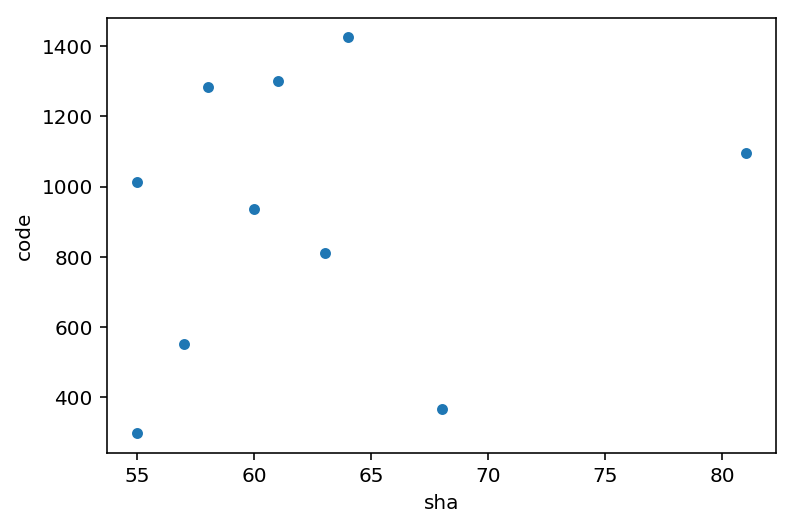

In [10]:
%matplotlib inline
top10.plot.scatter('sha', 'code');

### Ende des ersten Hands-Ons

## Weitere Analysen

* Abhängigkeitsanalyse mit Daten von `jdeps` und Visualisierung mit `D3` ([Code](https://github.com/feststelltaste/software-analytics/blob/master/demos/20190704_JFS_2019/jdeps_demo.ipynb), [Statisch](https://nbviewer.jupyter.org/github/feststelltaste/software-analytics/blob/master/demos/20190704_JFS_2019/jdeps_demo.ipynb), [Interaktiv](https://mybinder.org/v2/gh/feststelltaste/software-analytics/master?filepath=demos%2F20190704_JFS_2019%2Fjdeps_demo.ipynb)).
* Analyse von Performance-Hotspots mit jQAssistant / Neo4j ([Code](https://github.com/feststelltaste/software-analytics/blob/master/notebooks/Mining%20performance%20HotSpots%20with%20JProfiler%2C%20jQAssistant%2C%20Neo4j%20and%20Pandas.ipynb), [Blog Teil 1](https://www.feststelltaste.de/mining-performance-hotspots-with-jprofiler-jqassistant-neo4j-and-pandas-part-1-the-call-graph/), [Blog Teil 2](https://www.feststelltaste.de/mining-performance-hotspots-with-jprofiler-jqassistant-neo4j-and-pandas-part-2-the-call-graph/))
* Priorisieren von Aufräumarbeiten mit Groovy / Tablesaw ([Code](https://github.com/feststelltaste/software-analytics/blob/master/notebooks/Production%20Coverage%20Demo%20with%20Tablesaw%20and%20BeakerX.ipynb))

## Zusammenfassung
**1.** <b>Analysen</b> mit Standard-Werkzeugen <b>einfach</b> möglich  
**2.** Wer mehr will bekommt auch <b>mehr</b>!  
**3.** Es gibt unglaublich <b>viele Quellen</b> für Daten in der Softwareentwicklung  

<b>=> von der <strong>Frage</strong> über die <span class="green">Daten</span> zur <span class="blue" style="background-color: #FFFF00">Erkenntnis</span>!</b>

## Tipps zum Einstieg
* Adam Tornhill: Software Design X-Ray 
* Wes McKinney: Python For Data Analysis
* Leek, Jeff: The Elements of Data Analytic Style
* Tim Menzies, Laurie Williams, Thomas Zimmermann: Perspectives on Data Science for Software Engineering
* Mini-Tutorial ([Blog](https://www.feststelltaste.de/mini-tutorial-git-log-analyse-mit-python-und-pandas/))

# Vielen Dank! Fragen?

<b>Markus Harrer</b><br/>
innoQ Deutschland GmbH
  
markus.harrer@innoq.com 

`@feststelltaste`

<small>Demos & "Slides": https://github.com/feststelltaste/software-analytics => demos/20190704_JFS_2019/</small>
<img src="../resources/innoq_logo.jpg" width="20%" heigth="20%" align="right"/>